In [1]:
import os
import cv2
import shutil
from glob import glob
import numpy as np
from ultralytics import YOLO
import albumentations as A
import random
import matplotlib.pyplot as plt
import shutil

## Функция, которая пишет видео в требуемой папке записи, а также записывает видео кадры в папку с именем, таким же, как класс.

In [3]:
def capture_video_and_frames(root, frame_dir, class_name):
    # Create a directory to save the frames and videos
    if os.path.exists(frame_dir):
        shutil.rmtree(frame_dir)
    os.mkdir(frame_dir)

    # Initialize the video capture object
    cap = cv2.VideoCapture(0)

    # Define the codec and create a VideoWriter object
    video_file_path = f'{root}/{class_name}.avi'
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(video_file_path, fourcc, 20.0, (640, 480))

    # Capture video and frames
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Save the frame to the directory
        frame_file_path = os.path.join(frame_dir, f"frame_{frame_count:06d}.jpg")
        cv2.imwrite(frame_file_path, frame)

        # Write the frame to the video file
        out.write(frame)

        # Display the frame
        cv2.imshow('frame', frame)

        # Exit on key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        frame_count += 1

    # Release the video capture object and close the window
    cap.release()
    out.release()
    cv2.destroyAllWindows()

## Создадим коллекции видео и кадров для каждого класса

In [17]:
capture_video_and_frames(root='video recordings', frame_dir='book frames', class_name='book')

In [27]:
capture_video_and_frames(root='video recordings', frame_dir='pen frames', class_name='pen')

In [21]:
capture_video_and_frames(root='video recordings', frame_dir='student frames', class_name='student')

In [23]:
capture_video_and_frames(root='video recordings', frame_dir='passport frames', class_name='passport')

## Запишем все классы в переменную для дальнейшего использования

In [5]:
class_names = [
    'book',
    'pen',
    'student',
    'passport'
]

## Удалим лишние изображение (Оставим 10)

In [7]:
images_per_class = 10
for class_name in class_names:
    images = glob(f'{class_name} frames/*.jpg')
    amount_for_erasing = len(images) - images_per_class
    for _ in range(amount_for_erasing):
        idx = np.random.randint(0, len(images))
        img = images.pop(idx)
        os.remove(img)

## Переименуем изображения (Префикс в начале)

In [10]:
for class_name in class_names:
    folder_name = f'{class_name} frames'
    
    for filename in os.listdir(folder_name):
        if os.path.isfile(os.path.join(folder_name, filename)):
            new_filename = f"{folder_name}_{filename}"
            os.rename(os.path.join(folder_name, filename), os.path.join(folder_name, new_filename))

## Копирование файлов в единую папку (Original frames and labels/original frames)

In [47]:
dst_dir = 'original frames and labels/original frames'
os.makedirs(dst_dir)

for class_name in class_names:
    src_dir = f'{class_name} frames'
    
    for filename in os.listdir(src_dir):
        src_file = os.path.join(src_dir, filename)
        dst_file = os.path.join(dst_dir, filename)
        if os.path.isfile(src_file):
            shutil.copy2(src_file, dst_file)

## Загрузим модель YOLOv8Run all images from yolo. Bboxes will be stored in yolo format in runs/predict/detection/labels.m

In [12]:
yolo = YOLO('yolov8m.pt')

Запустите все изображения от YOLO. Коробки будут храниться в формате YOLO в runs/predict/detection/labels.

In [15]:
yolo(source=glob('original frames and labels/original frames/*.jpg'), save_txt=True)


0: 640x640 1 book, 357.1ms
1: 640x640 1 book, 357.1ms
2: 640x640 1 book, 357.1ms
3: 640x640 1 book, 357.1ms
4: 640x640 1 book, 357.1ms
5: 640x640 1 book, 357.1ms
6: 640x640 1 dog, 1 book, 357.1ms
7: 640x640 (no detections), 357.1ms
8: 640x640 (no detections), 357.1ms
9: 640x640 (no detections), 357.1ms
10: 640x640 1 book, 357.1ms
11: 640x640 1 book, 357.1ms
12: 640x640 1 book, 357.1ms
13: 640x640 1 book, 357.1ms
14: 640x640 (no detections), 357.1ms
15: 640x640 (no detections), 357.1ms
16: 640x640 (no detections), 357.1ms
17: 640x640 (no detections), 357.1ms
18: 640x640 1 dining table, 1 book, 357.1ms
19: 640x640 1 dining table, 1 book, 357.1ms
20: 640x640 1 toothbrush, 357.1ms
21: 640x640 1 toothbrush, 357.1ms
22: 640x640 1 scissors, 357.1ms
23: 640x640 1 scissors, 357.1ms
24: 640x640 1 scissors, 1 toothbrush, 357.1ms
25: 640x640 1 scissors, 1 toothbrush, 357.1ms
26: 640x640 1 scissors, 1 toothbrush, 357.1ms
27: 640x640 1 scissors, 1 toothbrush, 357.1ms
28: 640x640 1 scissors, 357.1ms

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

## Изменим классы объектов, которые предсказал YOLO

In [17]:
for file in glob(f'runs/detect/predict/labels/*.*'):
    with open(file, 'r') as f:
        contents = f.read().strip().split('\n')
    if len(contents) == 0:
        continue
    for i in range(len(contents)):
        line = contents[i].split()
        line[0] =  str(class_names.index(file.split('\\')[1].split()[0]))
        contents[i] = ' '.join(line)#
    with open(file, 'w') as f:
        f.write('\n'.join(contents))

## Проведем аугментацию изображений и копируем их в единую папку

In [70]:
# Улучшенные аугментации
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),  # Добавляем вертикальное отражение
    A.RandomBrightnessContrast(p=0.3),  # Изменение яркости/контраста
    A.RandomGamma(p=0.2),  # Гамма-коррекция
    A.Blur(blur_limit=3, p=0.1),  # Размытие
    A.MedianBlur(blur_limit=3, p=0.1),  # Медианное размытие
    A.RandomRotate90(p=0.3),  # Случайный поворот на 90°
    A.RandomSizedBBoxSafeCrop(width=224, height=224, p=1.0),  # Безопасный кроп с сохранением bbox
    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.3),  # Цветовые искажения
    A.ColorJitter(brightness=0.3, contrast=0.3, p=0.5)
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

# Создаем папки
os.makedirs('frames and labels/frames', exist_ok=True)
os.makedirs('frames and labels/labels', exist_ok=True)

# Обработка изображений
for img_name in os.listdir('original frames and labels/original frames'):
    if not img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        continue
        
    img_path = f'original frames and labels/original frames/{img_name}'
    base_name = os.path.splitext(img_name)[0]
    
    image = cv2.imread(img_path)
    if image is None:
        continue
    
    # Чтение меток
    bboxes = []
    class_labels = []
    label_path = f'original frames and labels/original labels/{base_name}.txt'
    
    if os.path.exists(label_path):
        with open(label_path) as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    class_id, x, y, w, h = map(float, parts)
                    bboxes.append([x, y, w, h])
                    class_labels.append(int(class_id))
    
    for i in range(100):
        try:
            transformed = transform(image=image, bboxes=bboxes, class_labels=class_labels)
            
            # Сохраняем результаты только если bbox остались
            if transformed['bboxes']:
                output_img_path = f'frames and labels/frames/{base_name}_{i}.jpg'
                cv2.imwrite(output_img_path, transformed['image'])
                
                with open(f'frames and labels/labels/{base_name}_{i}.txt', 'w') as f:
                    for j, (x, y, w, h) in enumerate(transformed['bboxes']):
                        f.write(f"{transformed['class_labels'][j]} {x:.6f} {y:.6f} {w:.6f} {h:.6f}\n")
        except Exception as e:
            print(f"Ошибка при обработке {img_name}: {str(e)}")

## Посмотрим на данные, которые получились

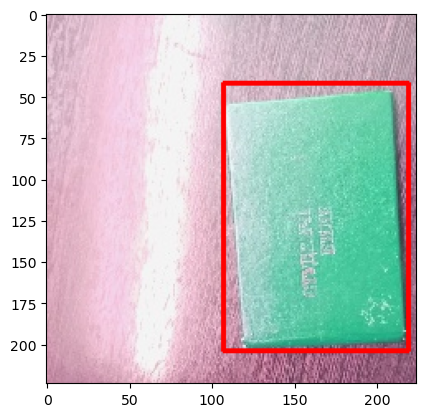

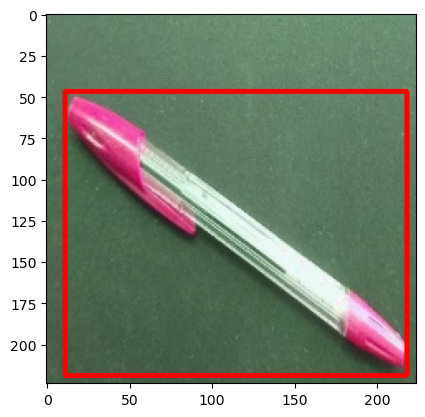

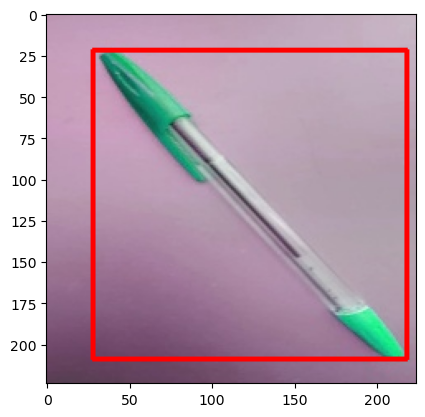

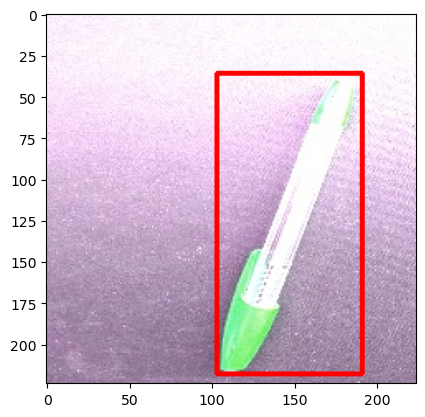

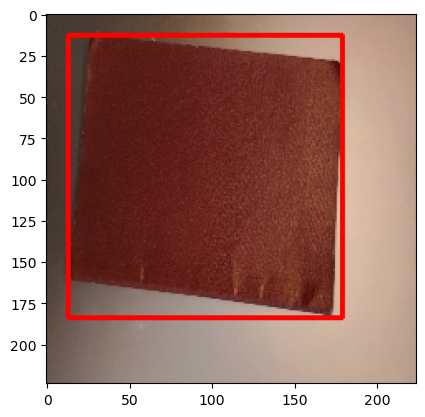

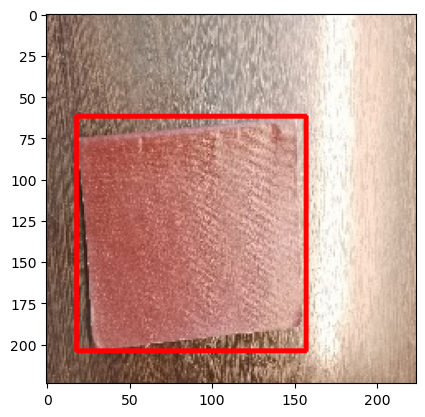

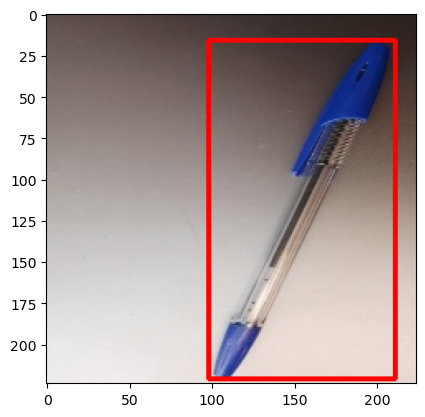

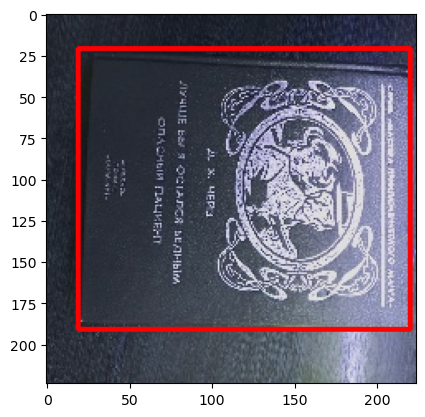

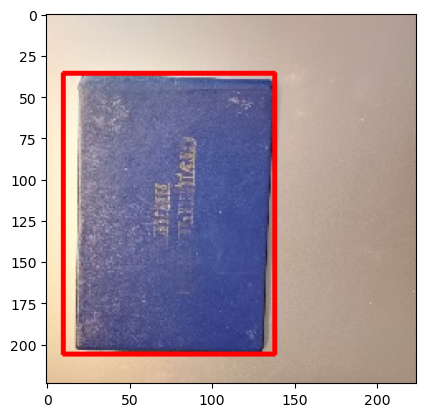

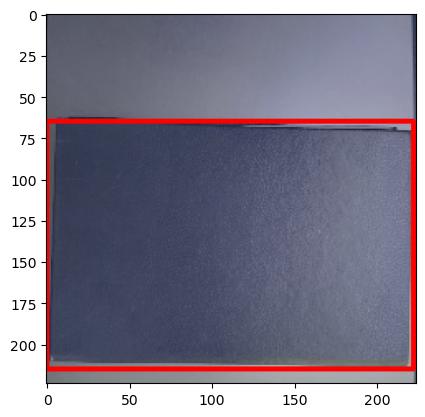

In [71]:
img_dir = 'frames and labels/frames'
label_dir = 'frames and labels/labels'

for img_name in random.sample(os.listdir(img_dir), 10):
    img = cv2.cvtColor(cv2.imread(f'{img_dir}/{img_name}'), cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]
    
    with open(f'{label_dir}/{img_name[:-4]}.txt') as f:
        for line in f:
            _, x, y, w_box, h_box = map(float, line.split())
            x1, y1 = int((x-w_box/2)*w), int((y-h_box/2)*h)
            x2, y2 = int((x+w_box/2)*w), int((y+h_box/2)*h)
            cv2.rectangle(img, (x1,y1), (x2,y2), (255,0,0), 2)
    
    plt.imshow(img)
    plt.show()

## Подготовим данные для обучения, создадим папки train, valid, test и копируем в них изображения для обучения в соотношении 8:1:1

In [72]:
# Define the root directory and the folders
root_dir = 'frames and labels'
images_folder = 'images'  # Изменили 'frames' на 'images'
labels_folder = 'labels'
train_dir = 'train'
test_dir = 'test'
valid_dir = 'valid'

# Create the train, test, and valid directories (с images вместо frames)
train_images_dir = os.path.join(root_dir, train_dir, images_folder)
train_labels_dir = os.path.join(root_dir, train_dir, labels_folder)
test_images_dir = os.path.join(root_dir, test_dir, images_folder)
test_labels_dir = os.path.join(root_dir, test_dir, labels_folder)
valid_images_dir = os.path.join(root_dir, valid_dir, images_folder)
valid_labels_dir = os.path.join(root_dir, valid_dir, labels_folder)

os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(test_images_dir, exist_ok=True)
os.makedirs(test_labels_dir, exist_ok=True)
os.makedirs(valid_images_dir, exist_ok=True)
os.makedirs(valid_labels_dir, exist_ok=True)

# Get the list of image and label files (читаем из исходной папки 'frames')
image_files = os.listdir(os.path.join(root_dir, 'frames'))  # Читаем из папки 'frames'
label_files = os.listdir(os.path.join(root_dir, labels_folder))

train_size = 0.8
test_size = 0.1
valid_size = 0.1

train_image_files = random.sample(image_files, int(len(image_files) * train_size))
test_image_files = random.sample(list(set(image_files) - set(train_image_files)), int(len(image_files) * test_size))
valid_image_files = list(set(image_files) - set(train_image_files) - set(test_image_files))

# Копируем файлы (из 'frames' в 'images')
for file in train_image_files:
    shutil.copy(os.path.join(root_dir, 'frames', file), train_images_dir)  # Копируем из 'frames'
    shutil.copy(os.path.join(root_dir, labels_folder, os.path.splitext(file)[0] + '.txt'), train_labels_dir)

for file in test_image_files:
    shutil.copy(os.path.join(root_dir, 'frames', file), test_images_dir)  # Копируем из 'frames'
    shutil.copy(os.path.join(root_dir, labels_folder, os.path.splitext(file)[0] + '.txt'), test_labels_dir)

for file in valid_image_files:
    shutil.copy(os.path.join(root_dir, 'frames', file), valid_images_dir)  # Копируем из 'frames'
    shutil.copy(os.path.join(root_dir, labels_folder, os.path.splitext(file)[0] + '.txt'), valid_labels_dir)

## Обучаем модель

In [79]:
results = yolo.train(data='frames and labels/data.yaml', epochs=4, device='cpu', imgsz=260, show=True)

Ultralytics 8.3.102  Python-3.12.7 torch-2.6.0+cpu CPU (AMD Ryzen 5 3500 6-Core Processor)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=frames and labels/data.yaml, epochs=4, time=None, patience=100, batch=16, imgsz=260, save=True, save_period=-1, cache=False, device=cpu, workers=0, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=True, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

train: Scanning C:\Users\Fylht\Jupyter\YOLOv8\frames and labels\train\labels... 3200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3200/3200 [00:07<00:00, 404.32it/s]


train: New cache created: C:\Users\Fylht\Jupyter\YOLOv8\frames and labels\train\labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\Fylht\Jupyter\YOLOv8\frames and labels\valid\labels... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:01<00:00, 378.46it/s]

val: New cache created: C:\Users\Fylht\Jupyter\YOLOv8\frames and labels\valid\labels.cache


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 288 train, 288 val
Using 0 dataloader workers
Logging results to runs\detect\train4
Starting training for 4 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/4         0G     0.4176     0.6099      1.006         37        288: 100%|██████████| 200/200 [15:29<00:00,  4.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:42<00:00,  3.23s/it]

                   all        400        400      0.991      0.992      0.994      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/4         0G     0.4397     0.4168      1.012         44        288: 100%|██████████| 200/200 [12:29<00:00,  3.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:37<00:00,  2.91s/it]

                   all        400        400      0.999          1      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/4         0G     0.4278     0.3935      1.008         38        288: 100%|██████████| 200/200 [12:02<00:00,  3.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:34<00:00,  2.68s/it]

                   all        400        400      0.997          1      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/4         0G     0.3834     0.3212     0.9766         38        288: 100%|██████████| 200/200 [10:04<00:00,  3.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:31<00:00,  2.43s/it]

                   all        400        400      0.999          1      0.995      0.976



4 epochs completed in 0.877 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 52.0MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 52.0MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics 8.3.102  Python-3.12.7 torch-2.6.0+cpu CPU (AMD Ryzen 5 3500 6-Core Processor)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:28<00:00,  2.17s/it]


                   all        400        400      0.999          1      0.995      0.976
                  book         99         99      0.998          1      0.995      0.992
                   pen         83         83      0.999          1      0.995      0.944
               student        111        111      0.999          1      0.995      0.982
              passport        107        107      0.998          1      0.995      0.988
Speed: 0.4ms preprocess, 67.1ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs\detect\train4


In [81]:
model = YOLO(r'C:\Users\Fylht\Jupyter\YOLOv8\runs\detect\train\weights\best.pt')

## ...

In [83]:
class_names = [
    'book',
    'pen',
    'student',
    'passport'
]

In [89]:
model(r'C:\Users\Fylht\Jupyter\YOLOv8\sample images', save=True)


image 1/7 C:\Users\Fylht\Jupyter\YOLOv8\sample images\photo_1_2025-04-06_15-29-16.jpg: 224x288 1 book, 2 pens, 78.6ms
image 2/7 C:\Users\Fylht\Jupyter\YOLOv8\sample images\photo_2025-04-06_15-41-54.jpg: 288x224 1 book, 2 pens, 84.9ms
image 3/7 C:\Users\Fylht\Jupyter\YOLOv8\sample images\photo_2025-04-06_15-42-14.jpg: 288x224 1 book, 2 pens, 1 passport, 73.8ms
image 4/7 C:\Users\Fylht\Jupyter\YOLOv8\sample images\photo_2025-04-06_15-42-18.jpg: 224x288 1 book, 3 pens, 75.3ms
image 5/7 C:\Users\Fylht\Jupyter\YOLOv8\sample images\photo_2025-04-06_15-42-20.jpg: 288x224 1 book, 2 pens, 95.1ms
image 6/7 C:\Users\Fylht\Jupyter\YOLOv8\sample images\photo_2_2025-04-06_15-29-16.jpg: 288x224 1 book, 116.7ms
image 7/7 C:\Users\Fylht\Jupyter\YOLOv8\sample images\photo_3_2025-04-06_15-29-16.jpg: 288x224 1 book, 1 pen, 111.1ms
Speed: 0.7ms preprocess, 90.8ms inference, 0.7ms postprocess per image at shape (1, 3, 288, 224)
Results saved to runs\detect\predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'book', 1: 'pen', 2: 'student', 3: 'passport'}
 obb: None
 orig_img: array([[[ 56,  66,  83],
         [ 64,  74,  91],
         [ 67,  76,  90],
         ...,
         [ 28,  28,  28],
         [ 29,  29,  29],
         [ 29,  29,  29]],
 
        [[ 55,  65,  82],
         [ 67,  77,  94],
         [ 74,  83,  97],
         ...,
         [ 27,  27,  27],
         [ 27,  27,  27],
         [ 28,  28,  28]],
 
        [[ 52,  62,  79],
         [ 69,  79,  96],
         [ 79,  88, 102],
         ...,
         [ 27,  27,  27],
         [ 27,  27,  27],
         [ 27,  27,  27]],
 
        ...,
 
        [[ 52,  65,  79],
         [ 74,  87, 101],
         [ 96, 109, 123],
         ...,
         [118,  97,  82],
         [108,  87,  72],
         [117,  96,  81]],
 
        [[ 40,  53,  67],
         [ 58,  71,  85],
         [ 78,  91, 1